In [7]:
import pandas as pd
import numpy as np

In [3]:
df_train = pd.read_csv(r'D:/Courses/Kaggle/nlp_tweets/nlp-getting-started/train.csv')
df_test = pd.read_csv(r'D:/Courses/Kaggle/nlp_tweets/nlp-getting-started/test.csv')

In [4]:
df_train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [11]:
df_train[df_train['target'] == 0]['text'].values[10]

"No way...I can't eat that shit"

In [13]:
df_train[df_train['target'] == 1]['text'].values[0]

'Forest fire near La Ronge Sask. Canada'

In [19]:
df_train[df_train['target'] == 0].count()

id          4342
keyword     4323
location    2884
text        4342
target      4342
dtype: int64

In [20]:
from sklearn import feature_extraction, linear_model, model_selection, preprocessing

In [21]:
df_train[df_train['target'] == 0]['text'].values

array(["What's up man?", 'I love fruits', 'Summer is lovely', ...,
       'These boxes are ready to explode! Exploding Kittens finally arrived! gameofkittens #explodingkittens\x89Û_ https://t.co/TFGrAyuDC5',
       'Sirens everywhere!',
       'I just heard a really loud bang and everyone is asleep great'],
      dtype=object)

In [53]:
count_vectorizer = feature_extraction.text.CountVectorizer()

example_train_vectors = count_vectorizer.fit_transform(df_train['text'][:5])

In [51]:
print(example_train_vectors[0].todense().shape)
print(example_train_vectors[0].todense())

(1, 98)
[[0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
  0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
  1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0]]


In [32]:
!pip install nltk

In [34]:
from nltk.tokenize import TweetTokenizer

In [47]:
tknzr = TweetTokenizer()
tknzr.tokenize(df_train[df_train['target'] == 1]['text'].values[0])

['Our',
 'Deeds',
 'are',
 'the',
 'Reason',
 'of',
 'this',
 '#earthquake',
 'May',
 'ALLAH',
 'Forgive',
 'us',
 'all']

In [46]:
df_train['text'][:1]

pandas.core.series.Series

In [54]:
train_vectors = count_vectorizer.fit_transform(df_train['text'])

test_vectors = count_vectorizer.transform(df_test['text'])

In [125]:
%%time
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=40)
rf.fit(train_vectors, df_train['target'])

CPU times: total: 22.3 s
Wall time: 23.7 s


RandomForestClassifier(n_estimators=40)

In [126]:
scores_forest = model_selection.cross_val_score(rf, train_vectors, df_train['target'], cv=5, scoring='f1')

In [127]:
scores_forest 

array([0.54315789, 0.4898374 , 0.53547777, 0.52763295, 0.68760908])

In [128]:
rf.predict(test_vectors)

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [131]:
rf?

In [88]:
from sklearn.model_selection import GridSearchCV

In [118]:
print(locally_best_forest.best_params_, locally_best_forest.best_score_)

{'max_depth': 19, 'max_features': 40} 0.6160524174657012


In [108]:
tuned_forest = RandomForestClassifier(n_estimators=10, max_depth=14, random_state=17, max_features=47, n_jobs=-1)
tuned_forest.fit(train_vectors, df_train['target'])

RandomForestClassifier(max_depth=14, max_features=47, n_estimators=10,
                       n_jobs=-1, random_state=17)

In [114]:
preds = tuned_forest.predict(test_vectors)
preds[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [55]:
clf = linear_model.RidgeClassifier()

In [66]:
scores = model_selection.cross_val_score(clf, train_vectors, df_train['target'], cv=5, scoring='f1')
scores

array([0.6025641 , 0.50168919, 0.56985004, 0.50781969, 0.67275495])

In [69]:
predicts = model_selection.cross_val_predict(clf, train_vectors, df_train['target'], cv=5)
print(predicts[:15], df_train['target'][:15])

[0 1 0 1 0 1 1 0 1 1 1 0 0 1 1] 0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
Name: target, dtype: int64


In [57]:
clf.fit(train_vectors, df_train['target'])

RidgeClassifier()

In [59]:
from sklearn.metrics import f1_score

In [132]:
sample_submissions = pd.read_csv(r'D:/Courses/Kaggle/nlp_tweets/nlp-getting-started/sample_submission.csv')

sample_submissions['target'] = rf.predict(test_vectors)
sample_submissions.head(20)

,id,target
0,0,0
1,2,1
2,3,1
3,9,0
4,11,1
5,12,1
6,21,0
7,22,0
8,27,0
9,29,0


In [133]:
sample_submissions.to_csv('baseline_rf.csv', index=False)

In [74]:
df = pd.concat([df_train, df_test])
df.shape

(10876, 5)

In [75]:
import re

In [77]:
example="New competition launched :https://www.kaggle.com/c/nlp-getting-started"

In [78]:
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

remove_URL(example)

'New competition launched :'

In [82]:
from string import printable
printable

'0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ \t\n\r\x0b\x0c'

In [185]:
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this earthquake Ma...,1.0
1,4,NaN,NaN,Forest fire near La Ronge Sask Canada,1.0
2,5,NaN,NaN,All residents asked to shelter in place are be...,1.0
3,6,NaN,NaN,13000 people receive wildfires evacuation orde...,1.0
4,7,NaN,NaN,Just got sent this photo from Ruby Alaska as s...,1.0
...,...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,NaN
3259,10865,NaN,NaN,Storm in RI worse than last hurricane My citya...,NaN
3260,10868,NaN,NaN,Green Line derailment in Chicago,NaN
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook HWO,NaN


In [135]:
df['text']=df['text'].apply(lambda x : remove_URL(x))

In [136]:
example = """<div>
<h1>Real or Fake</h1>
<p>Kaggle </p>
<a href="https://www.kaggle.com/c/nlp-getting-started">getting started</a>
</div>"""

In [137]:
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)
print(remove_html(example))


Real or Fake
Kaggle 
getting started



In [138]:
df['text']=df['text'].apply(lambda x : remove_html(x))

In [140]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
remove_emoji("Omg another Earthquake 😔😔")

'Omg another Earthquake '

In [141]:
df['text']=df['text'].apply(lambda x: remove_emoji(x))

In [144]:
import string
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

example="I am a #king"
print(remove_punct(example))

I am a king


In [158]:
# tex = '278927djhhfehw18307383402//?-=+@%#&#N3BVED'
# tex.translate(str.maketrans('','', string.punctuation))

'278927djhhfehw18307383402N3BVED'

In [161]:
df['text']=df['text'].apply(lambda x: remove_punct(x))

In [162]:
df['text']

0       Our Deeds are the Reason of this earthquake Ma...
1                   Forest fire near La Ronge Sask Canada
2       All residents asked to shelter in place are be...
3       13000 people receive wildfires evacuation orde...
4       Just got sent this photo from Ruby Alaska as s...
                              ...                        
3258    EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259    Storm in RI worse than last hurricane My citya...
3260                    Green Line derailment in Chicago 
3261            MEG issues Hazardous Weather Outlook HWO 
3262    CityofCalgary has activated its Municipal Emer...
Name: text, Length: 10876, dtype: object

In [167]:
!pip install pyspellchecker==0.5.3

     ---------------------------------------- 1.9/1.9 MB 5.8 MB/s eta 0:00:00
  Attempting uninstall: pyspellchecker
    Found existing installation: pyspellchecker 0.7.1
    Uninstalling pyspellchecker-0.7.1:
      Successfully uninstalled pyspellchecker-0.7.1


In [178]:
from spellchecker import SpellChecker

spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)
        
text = "corect me plese"
correct_spellings(text)

'correct me please'

In [193]:
#df['text']=df['text'].apply(lambda x : correct_spellings(x)#)

In [201]:
print(lambda x: correct_spellings(x), 'helo mster bro')

<function <lambda> at 0x0000029ED6A0DE50> helo mster bro


In [211]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop = set(stopwords.words())

In [212]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Алексей\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [304]:
from tqdm import tqdm
def create_corpus(df):
    corpus=[]
    for tweet in tqdm(df['text']):
        words=[word.lower() for word in word_tokenize(tweet) if((word.isalpha()==1) & (word not in stop))]
        corpus.append(words)
    return corpus

In [214]:
corpus=create_corpus(df)

100%|██████████████████████████████████████████████████████████████████████████| 10876/10876 [00:02<00:00, 4581.29it/s]


In [232]:
df['text']

0       Our Deeds are the Reason of this earthquake Ma...
1                   Forest fire near La Ronge Sask Canada
2       All residents asked to shelter in place are be...
3       13000 people receive wildfires evacuation orde...
4       Just got sent this photo from Ruby Alaska as s...
                              ...                        
3258    EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259    Storm in RI worse than last hurricane My citya...
3260                    Green Line derailment in Chicago 
3261            MEG issues Hazardous Weather Outlook HWO 
3262    CityofCalgary has activated its Municipal Emer...
Name: text, Length: 10876, dtype: object

In [248]:
import io
embedding_dict={}
with io.open(r'D:/Courses/Kaggle/nlp_tweets/nlp-getting-started/glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values=line.split()
        word=values[0]
        vectors=np.asarray(values[1:],'float32')
        embedding_dict[word]=vectors
f.close()

In [263]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam

In [264]:
MAX_LEN=50
tokenizer_obj=Tokenizer()
tokenizer_obj.fit_on_texts(corpus)
sequences=tokenizer_obj.texts_to_sequences(corpus)

tweet_pad=pad_sequences(sequences,maxlen=MAX_LEN,truncating='post', padding='post')

In [269]:
word_index=tokenizer_obj.word_index
print('Number of unique words:',len(word_index))

Number of unique words: 20204


In [298]:
tweet_pad

array([[ 520, 5313,  623, ...,    0,    0,    0],
       [  63,    6,  653, ...,    0,    0,    0],
       [  79, 1328, 1249, ...,    0,    0,    0],
       ...,
       [ 634,  398,  280, ...,    0,    0,    0],
       [3926,  448,  304, ...,    0,    0,    0],
       [3838, 2396, 1322, ...,    0,    0,    0]])

In [296]:
num_words=len(word_index)+1
embedding_matrix=np.zeros((num_words,100))

for word,i in tqdm(word_index.items()):
    if i > num_words:
        continue
    
    emb_vec=embedding_dict.get(word)
    if emb_vec is not None:
        embedding_matrix[i]=emb_vec
        


100%|████████████████████████████████████████████████████████████████████████| 20204/20204 [00:00<00:00, 480954.16it/s]


In [297]:
embedding_matrix.shape

(20205, 100)

In [299]:
model=Sequential()

embedding=Embedding(num_words,100,embeddings_initializer=Constant(embedding_matrix),
                   input_length=MAX_LEN,trainable=False)

model.add(embedding)
model.add(SpatialDropout1D(0.2))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))


optimzer=Adam(learning_rate=1e-5)

model.compile(loss='binary_crossentropy',optimizer=optimzer,metrics=['accuracy'])

In [300]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 100)           2020500   
                                                                 
 spatial_dropout1d (SpatialD  (None, 50, 100)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 64)                42240     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 2,062,805
Trainable params: 42,305
Non-trainable params: 2,020,500
_________________________________________________________________


In [309]:
train=tweet_pad[:df_train.shape[0]]
test=tweet_pad[df_train.shape[0]:]

In [313]:
train

array([[ 520, 5313,  623, ...,    0,    0,    0],
       [  63,    6,  653, ...,    0,    0,    0],
       [  79, 1328, 1249, ...,    0,    0,    0],
       ...,
       [ 328,  386, 1320, ...,    0,    0,    0],
       [  14, 1002, 3667, ...,    0,    0,    0],
       [   2,  101,   57, ...,    0,    0,    0]])

In [310]:
print(train.shape, test.shape)

(7613, 50) (3263, 50)


In [312]:
X_train,X_test,y_train,y_test=train_test_split(train,df_train['target'].values,test_size=0.2)
print('Shape of train',X_train.shape)
print("Shape of Validation ",X_test.shape)

Shape of train (6090, 50)
Shape of Validation  (1523, 50)


In [318]:
%%time
history=model.fit(X_train,y_train,batch_size=4,epochs=40,validation_data=(X_test,y_test),verbose=2)

Epoch 1/40
1523/1523 - 29s - loss: 0.4718 - accuracy: 0.7869 - val_loss: 0.4439 - val_accuracy: 0.8070 - 29s/epoch - 19ms/step
Epoch 2/40
1523/1523 - 29s - loss: 0.4724 - accuracy: 0.7852 - val_loss: 0.4418 - val_accuracy: 0.8102 - 29s/epoch - 19ms/step
Epoch 3/40
1523/1523 - 32s - loss: 0.4705 - accuracy: 0.7906 - val_loss: 0.4409 - val_accuracy: 0.8089 - 32s/epoch - 21ms/step
Epoch 4/40
1523/1523 - 30s - loss: 0.4699 - accuracy: 0.7864 - val_loss: 0.4400 - val_accuracy: 0.8102 - 30s/epoch - 20ms/step
Epoch 5/40
1523/1523 - 31s - loss: 0.4676 - accuracy: 0.7910 - val_loss: 0.4386 - val_accuracy: 0.8109 - 31s/epoch - 20ms/step
Epoch 6/40
1523/1523 - 31s - loss: 0.4632 - accuracy: 0.7923 - val_loss: 0.4380 - val_accuracy: 0.8070 - 31s/epoch - 20ms/step
Epoch 7/40
1523/1523 - 31s - loss: 0.4556 - accuracy: 0.7993 - val_loss: 0.4382 - val_accuracy: 0.8135 - 31s/epoch - 21ms/step
Epoch 8/40
1523/1523 - 33s - loss: 0.4587 - accuracy: 0.7949 - val_loss: 0.4374 - val_accuracy: 0.8142 - 33s/ep

In [319]:
sample_sub=pd.read_csv(r'D:/Courses/Kaggle/nlp_tweets/nlp-getting-started/sample_submission.csv')

In [320]:
y_pre=model.predict(test)
y_pre=np.round(y_pre).astype(int).reshape(3263)
sub=pd.DataFrame({'id':sample_sub['id'].values.tolist(),'target':y_pre})
sub.to_csv('D:/Courses/Kaggle/nlp_tweets/nlp-getting-started/submission_keras(40ep)_glove.csv',index=False)

102/102 [==============================] - 1s 7ms/step


In [321]:
sub.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


C:\Users\Алексей\AppData\Local\Temp\ipykernel_3348\3963659621.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, history.history['loss'], 'b', label='Training Loss', color='red')


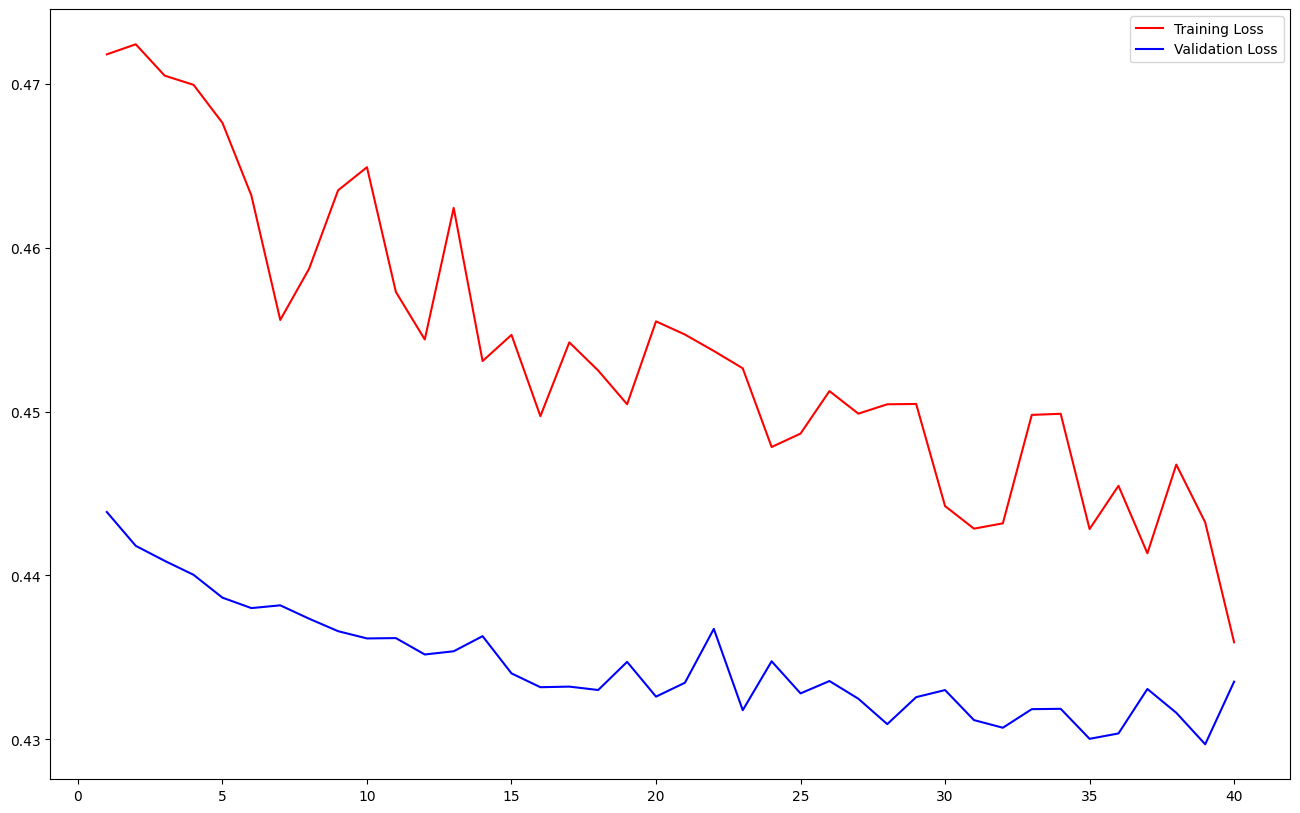

In [324]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
epochs = range(1, len(history.history['accuracy'])+1)
plt.plot(epochs, history.history['loss'], 'b', label='Training Loss', color='red')
plt.plot(epochs, history.history['val_loss'], 'b', label='Validation Loss')
plt.legend()
plt.show()

C:\Users\Алексей\AppData\Local\Temp\ipykernel_3348\3330407308.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, history.history['accuracy'], 'b', label='Training Accuracy', color='red')


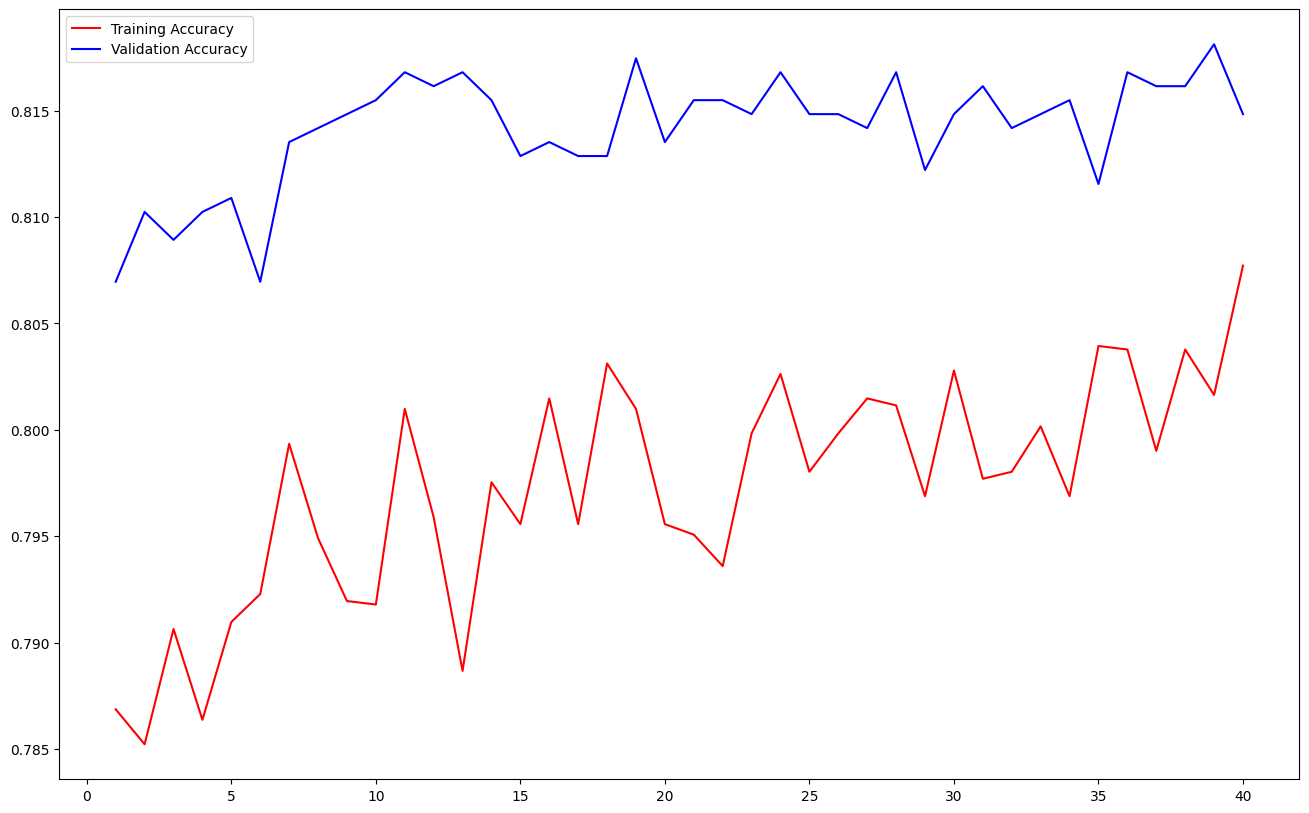

In [325]:
plt.figure(figsize=(16,10))
epochs = range(1, len(history.history['accuracy'])+1)
plt.plot(epochs, history.history['accuracy'], 'b', label='Training Accuracy', color='red')
plt.plot(epochs, history.history['val_accuracy'], 'b', label='Validation Accuracy')
plt.legend()
plt.show()